In [2]:
import pandas as pd

# read the excel file
ikea_df = pd.read_csv('ikea_kommun_data.txt', sep='\t', encoding='ISO-8859-1')


# print the first 5 rows of the dataframe
print(ikea_df.head())


   Kommun_code  Year     Kommun_name  Revenue  Employee  Population  \
0         2583  2010       Haparanda     1078       276       10059   
1          880  2010          Kalmar     3790      1621       62815   
2         1780  2010        Karlstad     4560      1910       85753   
3          114  2010  Upplands Väsby     1366       708       39289   
4          115  2010      Vallentuna      171        99       30114   

   Population_University  Percent_University  Productivity  SalesIndex  \
0                    719            0.071478     195.74174  111.075774   
1                   8716            0.138757     117.17365  390.516869   
2                  13308            0.155190     119.64794  469.856708   
3                   4419            0.112474      96.69215  140.750935   
4                   3843            0.127615      86.56347   17.619627   

   Infrast  Border  
0        0       1  
1        0       0  
2        0       0  
3        0       0  
4        0       0  


In [3]:
# count the number of missing values in each row
missing_values_per_row = ikea_df.isna().sum(axis=1)

# count the number of rows that have a given number of missing values
rows_with_missing_values = missing_values_per_row.value_counts()

# print the result
print(rows_with_missing_values)

0    207
dtype: int64


In [4]:
ikea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [5]:
ikea_df.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [6]:
new_df = ikea_df.drop(['Kommun_code', 'Year', 'Kommun_name', 'Infrast', 'Border'],axis = 1)
new_df

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
0,1078,276,10059,719,0.071478,195.74174,111.075774
1,3790,1621,62815,8716,0.138757,117.17365,390.516869
2,4560,1910,85753,13308,0.155190,119.64794,469.856708
3,1366,708,39289,4419,0.112474,96.69215,140.750935
4,171,99,30114,3843,0.127615,86.56347,17.619627
...,...,...,...,...,...,...,...
202,52,33,7220,368,0.050970,78.97019,5.358015
203,51,24,4931,266,0.053944,106.49585,5.254976
204,6228,2995,135460,19516,0.144072,104.21387,641.725346
205,152,98,20456,1598,0.078119,77.73047,15.661890


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select the columns to use for PCA
pca_cols = ['Revenue', 'Employee', 'Population', 'Population_University', 'Percent_University', 'Productivity', 'SalesIndex']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df[pca_cols])

# Perform PCA with 95% variance retention
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# Print the explained variance ratios of each principal component
print(pca.explained_variance_ratio_)

#print(pca_data) #here we have 3 components that explains 90% if the variance

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2', 'PC3'])
print(pca_df)


[0.74100914 0.14146411 0.10717538]
          PC1       PC2       PC3
0   -0.256827  3.795376 -0.354488
1    1.822138  0.826915  0.626856
2    2.545419  0.857841  0.874369
3    0.286170  0.161894  0.314779
4   -0.291902 -0.215088  0.834730
..        ...       ...       ...
202 -1.068566 -0.337967 -0.938364
203 -1.011093  0.640097 -0.813069
204  3.817212  0.262281  0.233111
205 -0.737757 -0.437497 -0.333067
206 -0.833681  0.273481 -0.428302

[207 rows x 3 columns]


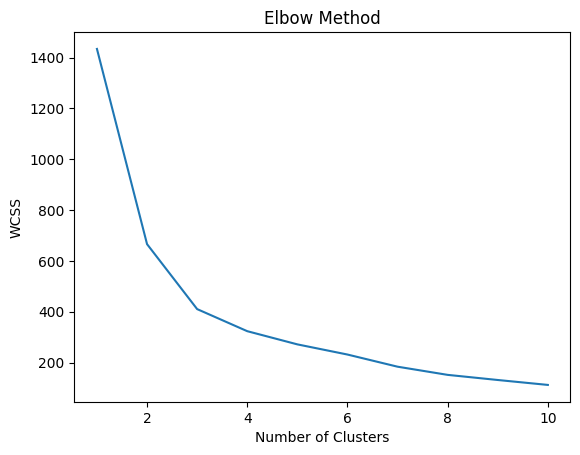

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
import matplotlib.pyplot as plt

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pca_df) 
pred_y

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [10]:
# Create a new DataFrame with the cluster labels
cluster_labels = pd.DataFrame({'Cluster': pred_y})

# Concatenate the original DataFrame and the new DataFrame
ikea_with_clusters = pd.concat([ikea_df, cluster_labels], axis=1)
ikea_with_clusters.head(6)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,0


In [11]:
print(ikea_with_clusters[ikea_with_clusters['Cluster'] == 2])


    Kommun_code  Year Kommun_name  Revenue  Employee  Population  \
19          180  2010   Stockholm    32897     18795      847073   

    Population_University  Percent_University  Productivity   SalesIndex  \
19                 191585            0.226173       87.7178  3389.665819   

    Infrast  Border  Cluster  
19        1       0        2  


In [12]:
# Define the list of municipalities with an IKEA store
ikea_municipalities = ['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö', 'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 'Västerås', 'Älmhult', 'Örebro']

# Add a new column "has_ikea" to the original dataframe
ikea_with_clusters['has_ikea'] = ikea_with_clusters['Kommun_name'].apply(lambda x: 1 if x in ikea_municipalities else 0)
ikea_with_clusters

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,1,1
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,0,0


In [13]:
print(ikea_with_clusters[ikea_with_clusters['has_ikea'] == 1])


     Kommun_code  Year  Kommun_name  Revenue  Employee  Population  \
0           2583  2010    Haparanda     1078       276       10059   
1            880  2010       Kalmar     3790      1621       62815   
2           1780  2010     Karlstad     4560      1910       85753   
19           180  2010    Stockholm    32897     18795      847073   
33           380  2010      Uppsala     7042      3391      197787   
52           580  2010    Linköping     5348      2280      146416   
64           680  2010    Jönköping     5298      2556      127382   
75           765  2010      Älmhult      847       853       15603   
117         1280  2010        Malmö    11217      5740      298963   
120         1283  2010  Helsingborg     5528      3244      129177   
168         1485  2010    Uddevalla     2309      1010       51868   
204         1880  2010       Örebro     6228      2995      135460   

     Population_University  Percent_University  Productivity   SalesIndex  \
0           

In [14]:
 final_df = ikea_with_clusters

In [15]:
final_df.loc[final_df["Cluster"]==0].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
count,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000
mean,1089.242938,2010.0,383.847458,211.118644,19891.514124,1898.355932,0.086854,88.464811,39.551163,0.039548,0.045198,0.0,0.016949
std,524.367750,0.0,438.150613,227.512818,14041.884470,1652.637373,0.027466,28.591230,45.146492,0.195448,0.208327,0.0,0.129447
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000,0.0,0.000000
25%,643.000000,2010.0,96.000000,57.000000,10177.000000,732.000000,0.066503,74.034550,9.891720,0.000000,0.000000,0.0,0.000000
50%,1266.000000,2010.0,203.000000,124.000000,14840.000000,1144.000000,0.082552,86.935390,20.916867,0.000000,0.000000,0.0,0.000000
75%,1465.000000,2010.0,563.000000,282.000000,26304.000000,2657.000000,0.099561,100.621400,58.010817,0.000000,0.000000,0.0,0.000000
max,2583.000000,2010.0,2309.000000,1109.000000,82608.000000,8023.000000,0.211698,275.636330,237.916478,1.000000,1.000000,0.0,1.000000


In [61]:
final_df.loc[final_df["Cluster"]==1].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.0,29.000000
mean,838.586207,2010.0,3887.758621,1796.758621,95952.137931,15070.620690,0.157762,109.827211,400.589796,0.068966,0.0,1.0,0.275862
std,585.173998,0.0,2204.145148,1098.520877,53193.842764,10039.710445,0.049116,14.386280,227.112365,0.257881,0.0,0.0,0.454859
min,123.000000,2010.0,500.000000,259.000000,31330.000000,3396.000000,0.082813,84.567850,51.519376,0.000000,0.0,1.0,0.000000
25%,184.000000,2010.0,2438.000000,1116.000000,64032.000000,9507.000000,0.126405,103.273100,251.208477,0.000000,0.0,1.0,0.000000
50%,780.000000,2010.0,3438.000000,1489.000000,85753.000000,12266.000000,0.140617,108.235130,354.247229,0.000000,0.0,1.0,0.000000
75%,1380.000000,2010.0,5119.000000,2280.000000,110488.000000,16395.000000,0.190654,118.363360,527.455371,0.000000,0.0,1.0,1.000000
max,1880.000000,2010.0,11217.000000,5740.000000,298963.000000,50084.000000,0.269646,151.001500,1155.785679,1.000000,0.0,1.0,1.000000


In [62]:
final_df.loc[final_df["Cluster"]==2].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
count,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0000,1.000000,1.0,1.0,1.0,1.0
mean,180.0,2010.0,32897.0,18795.0,847073.0,191585.0,0.226173,87.7178,3389.665819,1.0,0.0,2.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,180.0,2010.0,32897.0,18795.0,847073.0,191585.0,0.226173,87.7178,3389.665819,1.0,0.0,2.0,1.0
25%,180.0,2010.0,32897.0,18795.0,847073.0,191585.0,0.226173,87.7178,3389.665819,1.0,0.0,2.0,1.0
50%,180.0,2010.0,32897.0,18795.0,847073.0,191585.0,0.226173,87.7178,3389.665819,1.0,0.0,2.0,1.0
75%,180.0,2010.0,32897.0,18795.0,847073.0,191585.0,0.226173,87.7178,3389.665819,1.0,0.0,2.0,1.0
max,180.0,2010.0,32897.0,18795.0,847073.0,191585.0,0.226173,87.7178,3389.665819,1.0,0.0,2.0,1.0


In [17]:
cluster_means = ikea_with_clusters.groupby('Cluster')['Revenue', 'Employee', 'Population', 'Population_University', 'Percent_University', 'Productivity', 'SalesIndex'].mean()
print(cluster_means)


              Revenue      Employee     Population  Population_University  \
Cluster                                                                     
0          383.847458    211.118644   19891.514124            1898.355932   
1         3887.758621   1796.758621   95952.137931           15070.620690   
2        32897.000000  18795.000000  847073.000000          191585.000000   

         Percent_University  Productivity   SalesIndex  
Cluster                                                 
0                  0.086854     88.464811    39.551163  
1                  0.157762    109.827211   400.589796  
2                  0.226173     87.717800  3389.665819  


<ipython-input-17-08d53b8e6a2b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = ikea_with_clusters.groupby('Cluster')['Revenue', 'Employee', 'Population', 'Population_University', 'Percent_University', 'Productivity', 'SalesIndex'].mean()


In [19]:
print(ikea_with_clusters[ikea_with_clusters['Cluster'] == 1])


     Kommun_code  Year   Kommun_name  Revenue  Employee  Population  \
1            880  2010        Kalmar     3790      1621       62815   
2           1780  2010      Karlstad     4560      1910       85753   
7            123  2010      Järfälla     5119      2001       66211   
9            126  2010      Huddinge     7153      2374       97453   
16           160  2010          Täby     3441      1546       63789   
17           162  2010      Danderyd      500       272       31330   
18           163  2010    Sollentuna     2393      1116       64630   
20           181  2010    Södertälje     2191       894       86246   
21           182  2010         Nacka     3104      1489       90108   
23           184  2010         Solna     1491       847       68144   
24           186  2010       Lidingö      533       259       44017   
33           380  2010       Uppsala     7042      3391      197787   
42           484  2010    Eskilstuna     2844      1485       96311   
52    

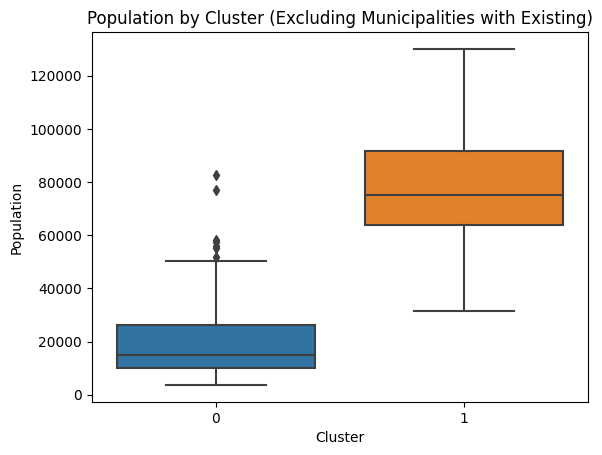

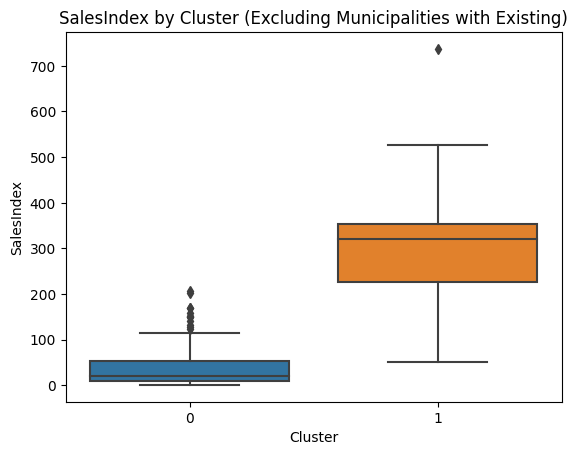

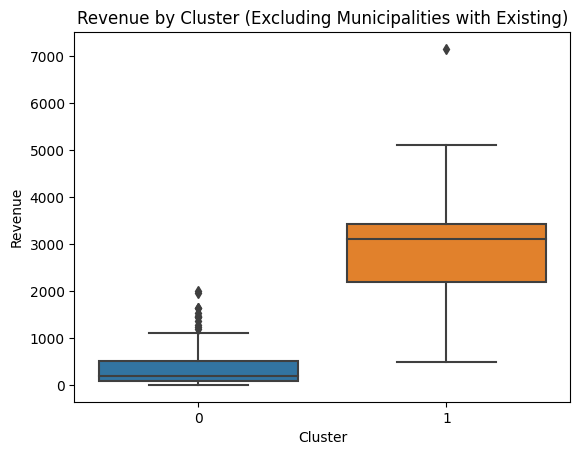

In [20]:
import seaborn as sns

# Define the relevant columns to analyze
cols_to_analyze = ['Population', 'SalesIndex', 'Revenue']

# Filter out rows where IKEA already exists or is close to existing IKEA
df_to_analyze = final_df[(final_df['has_ikea'] == 0)]

# Create box plots for each variable for each cluster
for col in cols_to_analyze:
    plt.figure()
    sns.boxplot(x='Cluster', y=col, data=df_to_analyze)
    plt.title(f'{col} by Cluster (Excluding Municipalities with Existing)')
    plt.show()


In [21]:
# Filter out rows where has_ikea is 1 or where the municipality is close to an existing IKEA store
ikea_df_filtered = final_df[(final_df['has_ikea'] == 0)]

# Filter the dataframe to only include cluster 1
cluster_1_filtered = final_df[(final_df['has_ikea'] == 0) & (final_df['Cluster'] == 1)]

# Sort the remaining municipalities by population, sales index, and revenue in descending order
top_candidates = cluster_1_filtered.sort_values(['Population', 'SalesIndex', 'Revenue'], ascending=False).head(10)

# Print the top candidates
print(top_candidates[['Kommun_name', 'Population', 'SalesIndex', 'Revenue']])



      Kommun_name  Population  SalesIndex  Revenue
53     Norrköping      130050  457.285981     4438
118          Lund      110488  354.247229     3438
173         Borås      103294  346.725400     3365
9        Huddinge       97453  737.036192     7153
42     Eskilstuna       96311  293.042210     2844
130      Halmstad       91800  329.311851     3196
21          Nacka       90108  319.832286     3104
20     Södertälje       86246  225.757905     2191
77          Växjö       83005  336.730641     3268
125  Kristianstad       79543  282.223141     2739


In [23]:
top_10_candidates = cluster_1_filtered.sort_values(by='Population', ascending=False).head(10)
top_10_candidates

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,1,0
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,1,0
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,1,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,0
42,484,2010,Eskilstuna,2844,1485,96311,9898,0.102771,95.97915,293.042210,0,0,1,0
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,1,0
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,1,0
20,181,2010,Södertälje,2191,894,86246,8734,0.101268,122.82270,225.757905,0,0,1,0
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,1,0
125,1290,2010,Kristianstad,2739,1285,79543,9507,0.119520,106.82248,282.223141,0,0,1,0
